# **Diabetes**

In [1]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (614, 8)
y_train shape: (614,)
x_test shape: (154, 8)
y_test shape: (154,)


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [8]:
from sklearn import metrics

conf_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)

print("Accuracy in Percentage:", int(accuracy_score * 100), "%")

Confusion Matrix:
 [[89 11]
 [18 36]]
Accuracy Score: 0.8116883116883117
Accuracy in Percentage: 81 %


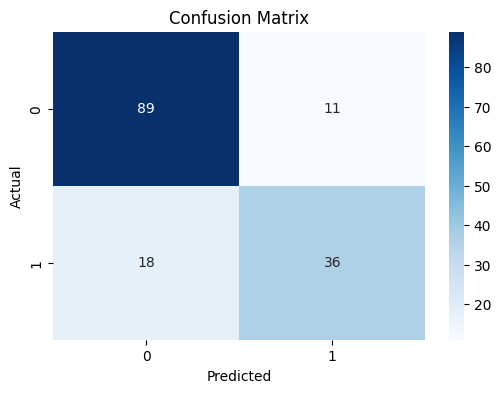

In [10]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')  # fmt='d' for integer formatting
plt.title("Confusion Matrix")
plt.show()